# CNN_MNIST
 CNN 알고리즘을 활용해 MNIST 예측 모델을 만들어 보자.

## 1. module, data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2. CNN 이해

 CNN 네트워크가 코드로 어떻게 구현되는지 알아보자. 이론이 코드로 구현되는 큰 과정은 다음과 같다.
* image + filter
* convolution(+ RELU) : activation을 위해 RELU 적용해야 하나, 이 단계에서는 생략한다.
* pooling

### Sample CNN

* 입력 데이터 
    - 1개의 흑백 이미지 데이터.
    - 입력 데이터 4차원 NumPy 배열로 변환 : (1, 3, 3, 1).
* 필터 : 임의로 설정. 예약어 주의.
* activation map
    - stride : 가로, 세로 방향 1.
    - 패딩 : `VALID` or `SAME`.
* pooling : `max_pool`.

In [6]:
# 입력데이터
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)
image.shape             # 성공!
print(image)
print(f"image의 shape은 {image.shape}입니다. 성공했어요!")

# filter
weight = np.array([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]])
print(weight)
print(f"weight의 shape은 {weight.shape}입니다.")
print("========================= image, filter(kernel) 준비 끝 ========================================")

# activation
conv2d = tf.nn.conv2d(image, # 1) 사용할 이미지
                      weight, # 2) 필터
                      strides = [1,1,1,1], # 3) stride : 가운데가 중요
                     padding = "VALID") # 4) 패딩 옵션 : 안하겠다.
print(f"convolution의 shape은 {conv2d.shape}입니다.")
# (1,2,2,3) : 1) 맨 앞 1은 이미지 개수, 2) 중간 (2,2)는 feature map의 shape, 3) 마지막 3은 필터 개수.
print(f"convolution은 {conv2d}입니다. 계산 어떻게 되나 연습해보세요.")

# session, run.
sess = tf.Session()
print(sess.run(conv2d)) # conv2d는 tensorflow node. 실행하여 numpy array로 뽑은 것.
print("========================= convolution 끝 ========================================")

# pooling layer
pool = tf.nn.max_pool(conv2d, # convolution에 대해 pooling 진행
                     ksize = [1,2,2,1], # kernel size 얼마만큼씩 띠어서 pool하나? # 맨앞과 뒤의 1은 더미였다.
                     strides = [1,1,1,1], # 1칸씩 이동할게!
                     padding = "SAME") # padding 진행하겠다.
print(f"pool의 shape은 {pool.shape}입니다. convolution과 달라졌나요?") # padding same 옵션 잡았으니까, shape 잡아보면 크기 같음
print(sess.run(pool))
print("========================= pool 끝 ========================================")

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
image의 shape은 (1, 3, 3, 1)입니다. 성공했어요!
[[[[ 1 10 -1]]

  [[ 1 10 -1]]]


 [[[ 1 10 -1]]

  [[ 1 10 -1]]]]
weight의 shape은 (2, 2, 1, 3)입니다.
========================= image, filter(kernel) 준비 끝 ========================================
convolution의 shape은 (1, 2, 2, 3)입니다.
convolution은 Tensor("Conv2D:0", shape=(1, 2, 2, 3), dtype=float32)입니다. 계산 어떻게 되나 연습해보세요.
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]]]]
========================= convolution 끝 ========================================
pool의 shape은 (1, 2, 2, 3)입니다. convolution과 달라졌나요?
[[[[ 28. 280. -12.]
   [ 28. 280. -16.]]

  [[ 28. 280. -24.]
   [ 28. 280. -28.]]]]
========================= pool 끝 ========================================


## 3. 이미지 확인

 convolution한 결과 이미지가 원본 이미지에 비해 어떻게 다른지 확인한다. 결과적으로, 이미지를 나타내는 특징적인 픽셀만 나온다. 이를 위해 MNIST 훈련 데이터 55000개 중 하나 들고 와서 : 원본 보고 -> convolution 보고 -> pooling 과정을 거친 후 원본 이미지가 어떻게 변하는지 확인한다.

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
conv2d 계산해보세요 몇 개일지
convolution의 shape은 (1, 14, 14, 5)입니다. 손으로 계산해보세영여영
pool한 결과의 shape은 (1, 7, 7, 5)입니다.
(5, 7, 7, 1)


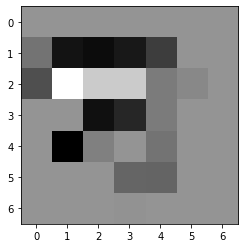

In [33]:
# module import
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt # 그림그려보기 위해

# data load
mnist = input_data.read_data_sets("./data/mnist",
                                 one_hot=True)
# mnist.train.images : 55000개, 784열

# check data
img = mnist.train.images[0].reshape(28,28) # 2차원 28*28 size.
plt.imshow(img, cmap = "Greys") # 원본 이미지

# 해당 원본 이미지에 convolution 처리
img = img.reshape(-1, 28, 28, 1)
W = tf.Variable(tf.random_normal([3,3,1, 5]), name = "filter1") # filter
print("conv2d 계산해보세요 몇 개일지")
conv2d = tf.nn.conv2d(img, W, strides = [1,2,2,1], padding = "SAME") # conv2d
print(f"convolution의 shape은 {conv2d.shape}입니다. 손으로 계산해보세영여영")
# stride가 1일 때 SAME 하면 처음과 끝이 동일하게 나온다.
# stride가 2일 때 SAME 잡으면 2 나눠서 나온다.

# convolution tensor 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
conv2d_result = sess.run(conv2d)

# 이미지 확인 : 축 전환
conv2d_img = np.swapaxes(conv2d_result, 0, 3)

# 축 전환 후 특징 뽑아 낸 각각의 이미지 확인
# plt.imshow(conv2d_img[0].reshape(14,14), cmap="Greys")
# plt.imshow(conv2d_img[1].reshape(14,14), cmap="Greys")
# plt.imshow(conv2d_img[2].reshape(14,14), cmap="Greys")
# plt.imshow(conv2d_img[3].reshape(14,14), cmap="Greys")
# plt.imshow(conv2d_img[4].reshape(14,14), cmap="Greys")

# pooling : 더 흐릿해진다.
pool = tf.nn.max_pool(conv2d_result, 
                     ksize = [1,2,2,1],
                     strides = [1,2,2,1]
                     padding = "VALID") 
print(f"pool한 결과의 shape은 {pool.shape}입니다.") # 7, 7

# pooling 후 이미지 확인.
pool = sess.run(pool)
pool_img = np.swapaxes(pool, 0, 3)
print(pool_img.shape)
#plt.imshow(pool_img[0].reshape(7,7), cmap="Greys") : 너무 흐릿하다.
plt.imshow(pool_img[1].reshape(7,7), cmap="Greys")

## 4. 모델링

In [38]:
# 필요한 모듈 불러오기
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# data load
mnist = input_data.read_data_sets("./data/mnist",
                                 one_hot= True)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [51]:
# tensorflow-MNIST with CNN

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# Graph 초기화
tf.reset_default_graph()

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

# Convolution Layer (Layer1)
x_img = tf.reshape(X, [-1,28,28,1]) # 몇장인지 모르고 28,28이고 색은 그레이스케일 1
W1 = tf.Variable(tf.random_normal([3,3,1,32]))
L1 = tf.nn.conv2d(x_img, W1, strides=[1,1,1,1], padding="SAME") # strides와 padding은 parameter값
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# Layer2
W2 = tf.Variable(tf.random_normal([3,3,32,64]))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# 이렇게 만든 data를 FC Layer에 넣어서 학습!
L2 = tf.reshape(L2, [-1, 7*7*64])
#L2.shape # TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

W3 = tf.get_variable("weight3", shape=[7*7*64,256],
                        initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name="bias3")
_L3 = tf.nn.relu(tf.matmul(L2, W3)+b3)
L3 = tf.nn.dropout(_L3, keep_prob=drop_rate)

# Layer 4
W4 = tf.get_variable("weight4", shape=[256,256],
                        initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]), name="bias4")
_L4 = tf.nn.relu(tf.matmul(L3, W4)+b4)
L4 = tf.nn.dropout(_L4, keep_prob=drop_rate)

# Layer 5
W5 = tf.get_variable("weight5", shape=[256,10],
                        initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]), name="bias5")

# Hypothesis
logit = tf.matmul(L4, W5)+b5
H = tf.nn.relu(logit)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                    labels = Y))

# train
train = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)

# Session & reset
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
num_of_epoch = 50
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = { X : batch_x,
                                                              Y : batch_y,
                                                              drop_rate : 0.75})
    if step % 5 == 0:
        print("Cost : {}".format(cost_val))
        
# 정확도 측정
predict = tf.argmax(H, 1)
is_correct = tf.equal(predict, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))
result = sess.run(accuracy,
                 feed_dict = {X : mnist.test.images,
                             Y : mnist.test.labels,
                             drop_rate : 1})
print(f"정확도는 {result}입니다.")

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Cost : 0.3225434124469757
Cost : 0.17546415328979492
Cost : 0.017594777047634125
Cost : 0.1369365155696869
Cost : 0.012903297320008278
Cost : 0.02968418411910534
Cost : 0.04002965986728668
Cost : 0.02480500377714634
Cost : 0.1298915296792984
Cost : 0.029111383482813835
정확도는 0.9850999712944031입니다.


## 참고

4차원 `ndarray`를 만들어 보자.

In [4]:
#sample = np.array([1]) # (1, ) : 1차원, 스칼라
#sample = np.array([[1,2]]) # (1, 2) : 1행 2열, 2차원 벡터 # [[1 2]]
sample = np.array([[1],[2]]) # (2, 1) : 2행 1열, 2차원 벡터 
# [[1]
# [2]]
print(sample)
sample.shape

[[1]
 [2]]


(2, 1)

In [5]:
# 어떻게 만드나? 끝에서부터 만든다
# (3,1) 짜리가 3개 있으면 [3,3,1]
# 그걸 전체를 배열로 잡아서 1개로 넣으면 (1,3,3,1)
# image = np.array([[1],[1],[1]]) # 이게 (3,1)짜리
# image = np.array([[[1],[1],[1]],[[1],[1],[1]],[[1],[1],[1]]]) # 여기까지 하면 (3,1)짜리가 3개 있음 : (3,3,1)
image = np.array([[[[1],[1],[1]],[[1],[1],[1]],[[1],[1],[1]]]]) # 위에까지 한 걸 하나로 묶어라
image.shape

(1, 3, 3, 1)